<a id=top-page></a>
# `pykitPIV` demo: Model astigmatic PIV

In this Jupyter notebook, we show how `pykitPIV` can be used to model astigmatic PIV.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

2025-05-27 14:59:27.531811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
n_images = 2
image_size = (100, 100)
size_buffer = 10
origin = 'lower'
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [4]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(3,3),
                     distances=(1,2),
                     densities=(0.01,0.01),
                     diameter_std=0,
                     seeding_mode='random', 
                     random_seed=100)

In [5]:
image = Image(random_seed=100)

In [6]:
image.add_particles(particles)

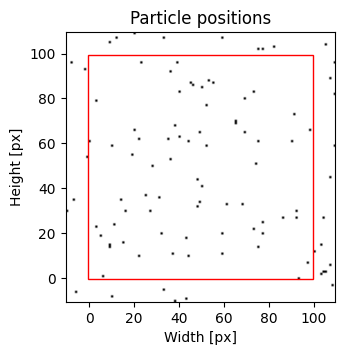

In [7]:
if save_images: filename = 'particle-positions.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           origin=origin,
           figsize=figsize, 
           filename=filename);

We specify the full covariance matrix:

In [8]:
covariance_matrix = np.array([[3.0, -2],
                              [-2, 2.0]])

In [9]:
image.add_reflected_light(exposures=(0.8,0.85),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/8, 
                          covariance_matrix=covariance_matrix)

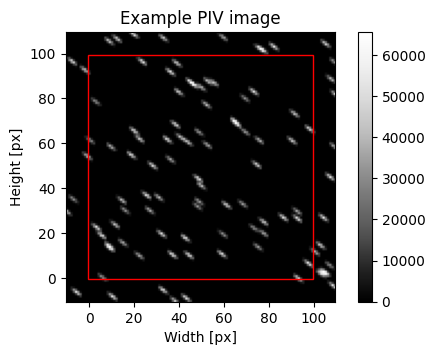

In [10]:
plt = image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

plt.colorbar()

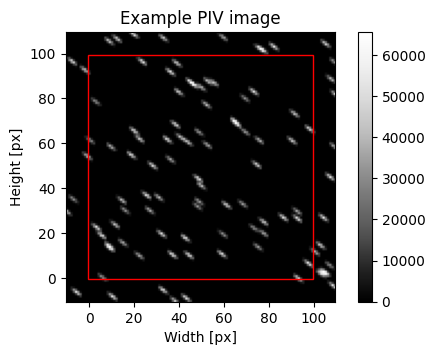

In [11]:
plt = image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

plt.colorbar()

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)